In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\ACER-PC\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading data from csv file
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#Checking for Null records
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
# Checking dataset is balanced or unbalanced 
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
# This dataset is unbalanced dataset

In [6]:
###################################################################################################################
# Implementing UPSAMPLING/OVERSAMPLING using SMOTE 

In [7]:
from imblearn.over_sampling import SMOTE

In [8]:
features = data.iloc[:,:-1].values
labels = data.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [10]:
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            labels, 
                                                                            test_size=0.2, 
                                                                            random_state=0)

In [11]:
oversampler=SMOTE(random_state=0)
os_features,os_labels=oversampler.fit_sample(features_train,labels_train)

In [12]:
# Performing Logistic regression 

In [48]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()

In [49]:
best_logModel = logModel.fit(os_features,os_labels)

In [50]:
print(best_logModel.score(os_features,os_labels))
print(best_logModel.score(features_test,labels_test))

0.9710249105313602
0.9791088796039464


In [51]:
from sklearn.metrics import confusion_matrix
actual=labels_test
predictions=best_logModel.predict(features_test)

In [52]:
confusion_matrix(actual,predictions)

array([[55682,  1179],
       [   11,    90]], dtype=int64)

In [53]:
#Checking Precision, Recall, F1 score

from sklearn.metrics import classification_report
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.07      0.89      0.13       101

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [54]:
# ROC score 

from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.9351771673183918


Text(0.5, 0, 'False Positive Rate')

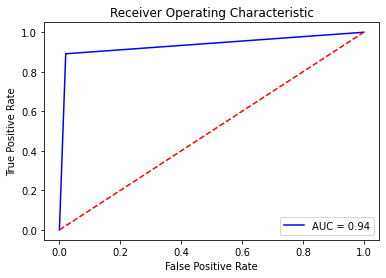

In [55]:
# Plotting of ROC for Logistic Regression 

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
#plt.xlim([-0.1,1.2])
#plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
# Performing Logistic regression with the help of Grid search to find a model with less misclassified records

In [13]:
from sklearn.linear_model import LogisticRegression
logModel = LogisticRegression()

In [69]:
#gridSearch
p = ['l1', 'l2', 'elasticnet', 'none']
s = ['lbfgs','newton-cg','liblinear','sag','saga']
pg = dict(penalty = p, solver=s)

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(logModel,param_grid=pg,cv=10)

gs.fit(os_features,os_labels)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                    'saga']})

In [70]:
gs.best_params_

{'penalty': 'none', 'solver': 'newton-cg'}

In [71]:
gs.best_estimator_

LogisticRegression(penalty='none', solver='newton-cg')

In [ ]:
# Received recommendation from GridSearchCV to use penalty as 'none' & solver as 'netwon-cg' & using these two 
# parameters trying to find generalized model with less misclassified records. 

In [124]:
grid_logModel = LogisticRegression(penalty='none', solver='newton-cg')

In [125]:
best_grid_logModel = grid_logModel.fit(os_features,os_labels)

In [126]:
print(best_grid_logModel.score(os_features,os_labels))
print(best_grid_logModel.score(features_test,labels_test))

0.9798244919851926
0.9905199957866648


In [ ]:
#As test score is greater (0.99) than training score(0.97), model is generalized 

In [127]:
from sklearn.metrics import confusion_matrix
actual=labels_test
predictions=best_grid_logModel.predict(features_test)

In [128]:
confusion_matrix(actual,predictions)

array([[56330,   531],
       [    9,    92]], dtype=int64)

In [ ]:
# Using grid search method , obtained model has less misclassified records & model is generalized one. 

In [129]:
#Checking Precision, Recall, F1 score

from sklearn.metrics import classification_report
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56861
           1       0.15      0.91      0.25       101

    accuracy                           0.99     56962
   macro avg       0.57      0.95      0.62     56962
weighted avg       1.00      0.99      0.99     56962



In [130]:
# ROC score 

from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.9507762633247901


Text(0.5, 0, 'False Positive Rate')

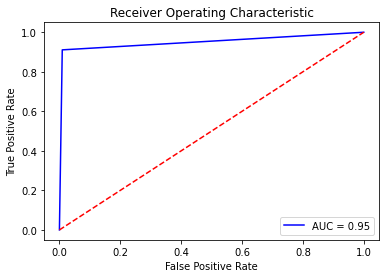

In [131]:
# Plotting of ROC for Logistic Regression(with the help of Grid Serach)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
#plt.xlim([-0.1,1.2])
#plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [12]:
# Trying other algorithms to find best model(generalized one) & less misclassified records

In [13]:
# Performing Random Forest Classification with the help of Grid search to find a model with less misclassified records

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [15]:
pg = {
    'max_depth': [10, 15],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy'],
    'n_estimators': [200,300]
}

In [16]:
#from sklearn.model_selection import GridSearchCV
#gs = GridSearchCV(rf,param_grid=pg,cv=10)

#gs.fit(os_features,os_labels)

In [17]:
#gs.best_params_

In [18]:
#gs.best_estimator_

In [19]:
# As the above grid search method is taking long more than 10 hrs , directly using the parameters in 
# RandomForestClassifier Alogorithm 

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=600,max_depth=15,max_features='sqrt',criterion='gini')

In [15]:
best_rf = rf.fit(os_features,os_labels)

In [16]:
print(best_rf.score(os_features,os_labels))
print(best_rf.score(features_test,labels_test))

0.9996262980646636
0.9993153330290369


In [17]:
from sklearn.metrics import confusion_matrix
actual=labels_test
predictions=best_rf.predict(features_test)

In [18]:
confusion_matrix(actual,predictions)

array([[56835,    26],
       [   13,    88]], dtype=int64)

In [19]:
#Checking Precision, Recall, F1 score

from sklearn.metrics import classification_report
print(classification_report(actual,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.77      0.87      0.82       101

    accuracy                           1.00     56962
   macro avg       0.89      0.94      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [20]:
# ROC score 

from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print (roc_auc)

0.935414936650275


Text(0.5, 0, 'False Positive Rate')

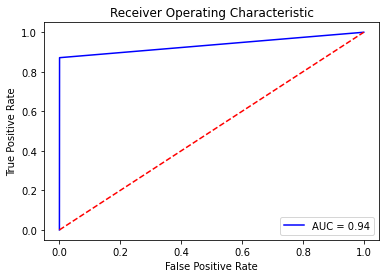

In [21]:
# Plotting of ROC for Random Forest Classifier (with the help of Grid Serach)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
#plt.xlim([-0.1,1.2])
#plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
# Less no of misclassified records are identified using Random Forest Classifier & also model is generalized.

# Logistic Regression 
# array([[56330,   531],
#       [    9,    92]], 

# Random Forest Classifier 
# array([[56835,    26],
#      [   13,    88]], 


In [ ]:
###################################################################################################################
# Implementing UNDERSAMPLING 